## Ciencia de datos

In [59]:
import pandas as pd
import os
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pydot
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
import pandas as pd

# Cargar el archivo CSV con el delimitador adecuado (coma)
ruta_Archivo = "/Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank_full_limpio.csv"
datos = pd.read_csv(ruta_Archivo, delimiter=",")

# Verificar la cantidad de columnas y sus nombres
print(f"Columnas detectadas: {len(datos.columns)}")
print(datos.columns)


Columnas detectadas: 43
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'Y'],
      dtype='object')


In [61]:
datos.head(8)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X34,X35,X36,X37,X38,X39,X40,X41,X42,Y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,42,2,5,380,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [62]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      45211 non-null  int64
 1   X2      45211 non-null  int64
 2   X3      45211 non-null  int64
 3   X4      45211 non-null  int64
 4   X5      45211 non-null  int64
 5   X6      45211 non-null  int64
 6   X7      45211 non-null  int64
 7   X8      45211 non-null  int64
 8   X9      45211 non-null  int64
 9   X10     45211 non-null  int64
 10  X11     45211 non-null  int64
 11  X12     45211 non-null  int64
 12  X13     45211 non-null  int64
 13  X14     45211 non-null  int64
 14  X15     45211 non-null  int64
 15  X16     45211 non-null  int64
 16  X17     45211 non-null  int64
 17  X18     45211 non-null  int64
 18  X19     45211 non-null  int64
 19  X20     45211 non-null  int64
 20  X21     45211 non-null  int64
 21  X22     45211 non-null  int64
 22  X23     45211 non-null  int64
 23  X24     452

Transformacion de variables categoricas y variable de interes

In [63]:
Parametros = datos[['X' + str(i) for i in range(1, 43)]]
Variable = datos['Y']
# Imprimir las primeras 5 filas de los parámetros desde X1 hasta X42

print(Parametros.head())

print(Variable.head())



   X1    X2  X3   X4  X5  X6  X7  X8  X9  X10  ...  X33  X34  X35  X36  X37  \
0  58  2143   5  261   1  -1   0   0   0    0  ...    0    0    0    1    0   
1  44    29   5  151   1  -1   0   0   0    0  ...    0    0    0    1    0   
2  33     2   5   76   1  -1   0   0   1    0  ...    0    0    0    1    0   
3  47  1506   5   92   1  -1   0   1   0    0  ...    0    0    0    1    0   
4  33     1   5  198   1  -1   0   0   0    0  ...    0    0    0    1    0   

   X38  X39  X40  X41  X42  
0    0    0    0    0    1  
1    0    0    0    0    1  
2    0    0    0    0    1  
3    0    0    0    0    1  
4    0    0    0    0    1  

[5 rows x 42 columns]
0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64


division del conjunto de datos para entrenamiento y validacion

In [64]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    Parametros, Variable, test_size=0.2, random_state=42) #Dividir el conjunto de datos en entrenamiento y valaidacion, 80% entrenamiento, 20% validacion

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42) #Dividir el conjunto en  entrenamiento

# Normalizar los datos
std_scl = StandardScaler()
std_scl.fit(X_train)

X_train = std_scl.transform(X_train)
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)


In [65]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

float64
float64
int64
int64


OPTIMIZADORES A USAR EN EL MODELO

In [66]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd

def build_model(activacion, neuronas, input_shape):
    """
    Construye un modelo secuencial con capas densas y activación personalizada.
    
    activacion: Función de activación.
    neuronas: Número de neuronas en la primera capa densa.
    input_shape: Forma de entrada de los datos.
    """
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")  # Activación para binaria
    ])
    return model

def build_and_train_model(optimizer, activacion, neuronas, epochs=50, batch_size=32, name="model"):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    
    # Compilar el modelo
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Callbacks para early stopping y guardar el mejor modelo
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f"best_model_{name}.h5", save_best_only=True)
    
    # Entrenar el modelo
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping, checkpoint],
        verbose=1
    )
    
    return model, history  # Devolver tanto el modelo como el historial


In [67]:
from tensorflow_addons.optimizers import RectifiedAdam, Lookahead, AdaBelief

# Definir la tasa de aprendizaje
learning_rate = 0.001

# Definir los optimizadores
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'AMSGrad': tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate),
    'RectifiedAdam': RectifiedAdam(learning_rate=learning_rate),
    'AdaBelief': AdaBelief(learning_rate=learning_rate)
}

# Entrenar el modelo y guardar historiales
histories = {}
for name, optimizer in optimizadores.items():
    print(f"\nEntrenando modelo con optimizador {name}...")
    model, history = build_and_train_model(optimizer, activacion="relu", neuronas=64, name=name)
    histories[name] = history  # Guardar solo el historial



Entrenando modelo con optimizador Adagrad...
Epoch 1/50
905/905 [==============================] - 2s 1ms/step - loss: 0.4872 - accuracy: 0.8201 - val_loss: 0.3946 - val_accuracy: 0.8774
Epoch 2/50
135/905 [===>..........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.8785

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


905/905 [==============================] - 1s 1ms/step - loss: 0.3645 - accuracy: 0.8821 - val_loss: 0.3456 - val_accuracy: 0.8826
Epoch 3/50
905/905 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8864 - val_loss: 0.3205 - val_accuracy: 0.8866
Epoch 4/50
905/905 [==============================] - 1s 1ms/step - loss: 0.3105 - accuracy: 0.8883 - val_loss: 0.3051 - val_accuracy: 0.8890
Epoch 5/50
905/905 [==============================] - 1s 1ms/step - loss: 0.2979 - accuracy: 0.8902 - val_loss: 0.2947 - val_accuracy: 0.8894
Epoch 6/50
905/905 [==============================] - 1s 1ms/step - loss: 0.2892 - accuracy: 0.8916 - val_loss: 0.2874 - val_accuracy: 0.8905
Epoch 7/50
905/905 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.8925 - val_loss: 0.2818 - val_accuracy: 0.8911
Epoch 8/50
905/905 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8936 - val_loss: 0.2775 - val_accuracy: 0.8936
Epoch 9/50
905/90

Matriz

283/283 [==============================] - 0s 749us/step


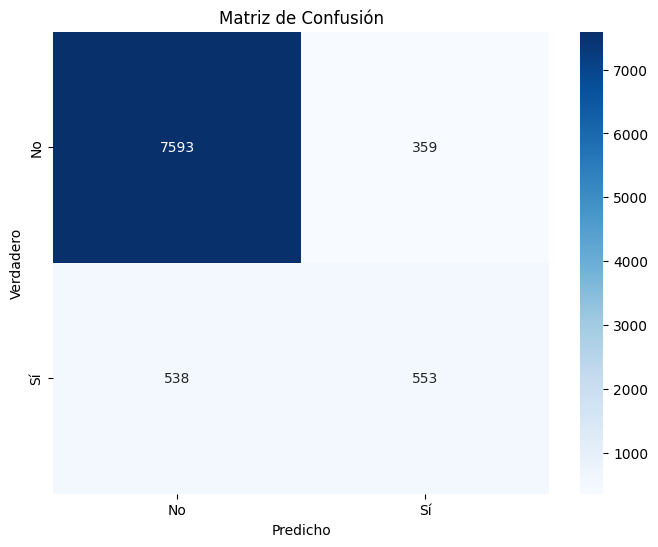

Accuracy - Exactitud: 90.0%
Precisión positiva: 60.64%
Precisión Negativa: 93.38%
Verdaderos positivos (TPR-Recall): 50.69%
Verdaderos negativos (TNR-Recall): 95.49%
Negativos identificados como positivos (Error tipo 1 FPR): 4.51%
Positivos identificados como negativos (Error tipo 2 FNR): 49.31%


In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Paso 1: Hacer predicciones en el conjunto de prueba con el último modelo entrenado
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.50).astype(int)  # Convertir predicciones en 0 o 1 según el umbral

# Paso 2: Calcular la matriz de confusión
matrix = confusion_matrix(y_test, y_pred) #Calcular cada pedazo de la matriz. Calculo los costos.


# Paso 3: Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Paso 4: Calcular e imprimir las métricas de evaluación

# Accuracy - Exactitud
result = (matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][1] + matrix[1][0])
print(f'Accuracy - Exactitud: {round(result * 100, 0)}%')

# Precisión positiva (Precision)
result = matrix[1][1] / (matrix[1][1] + matrix[0][1])
print(f'Precisión positiva: {round(result * 100, 2)}%')

# Precisión negativa (Negative Predictive Value - NPV)
result = matrix[0][0] / (matrix[0][0] + matrix[1][0])
print(f'Precisión Negativa: {round(result * 100, 2)}%')

# Verdaderos positivos (True Positive Rate - TPR o Recall)
result = matrix[1][1] / (matrix[1][0] + matrix[1][1])
print(f'Verdaderos positivos (TPR-Recall): {round(result * 100, 2)}%')

# Verdaderos negativos (True Negative Rate - TNR o Specificity)
result = matrix[0][0] / (matrix[0][0] + matrix[0][1])
print(f'Verdaderos negativos (TNR-Recall): {round(result * 100, 2)}%')

# Error tipo I - Falsos positivos (False Positive Rate - FPR)
result = matrix[0][1] / (matrix[0][0] + matrix[0][1])
print(f'Negativos identificados como positivos (Error tipo 1 FPR): {round(result * 100, 2)}%')

# Error tipo II - Falsos negativos (False Negative Rate - FNR)
result = matrix[1][0] / (matrix[1][0] + matrix[1][1])
print(f'Positivos identificados como negativos (Error tipo 2 FNR): {round(result * 100, 2)}%')


Precision del modelo con optimizadores


In [69]:
# Evalúa el modelo en el conjunto de prueba
loss_test, accuracy_test = model.evaluate(X_test, y_test)

# Imprime el valor de la función de pérdida y la precisión en el conjunto de prueba
print(f"Función de pérdida en el conjunto de prueba: {loss_test}")
print(f"Precisión en el conjunto de prueba: {accuracy_test}")

283/283 [==============================] - 0s 877us/step - loss: 0.2214 - accuracy: 0.9008
Función de pérdida en el conjunto de prueba: 0.22137708961963654
Precisión en el conjunto de prueba: 0.90080726146698


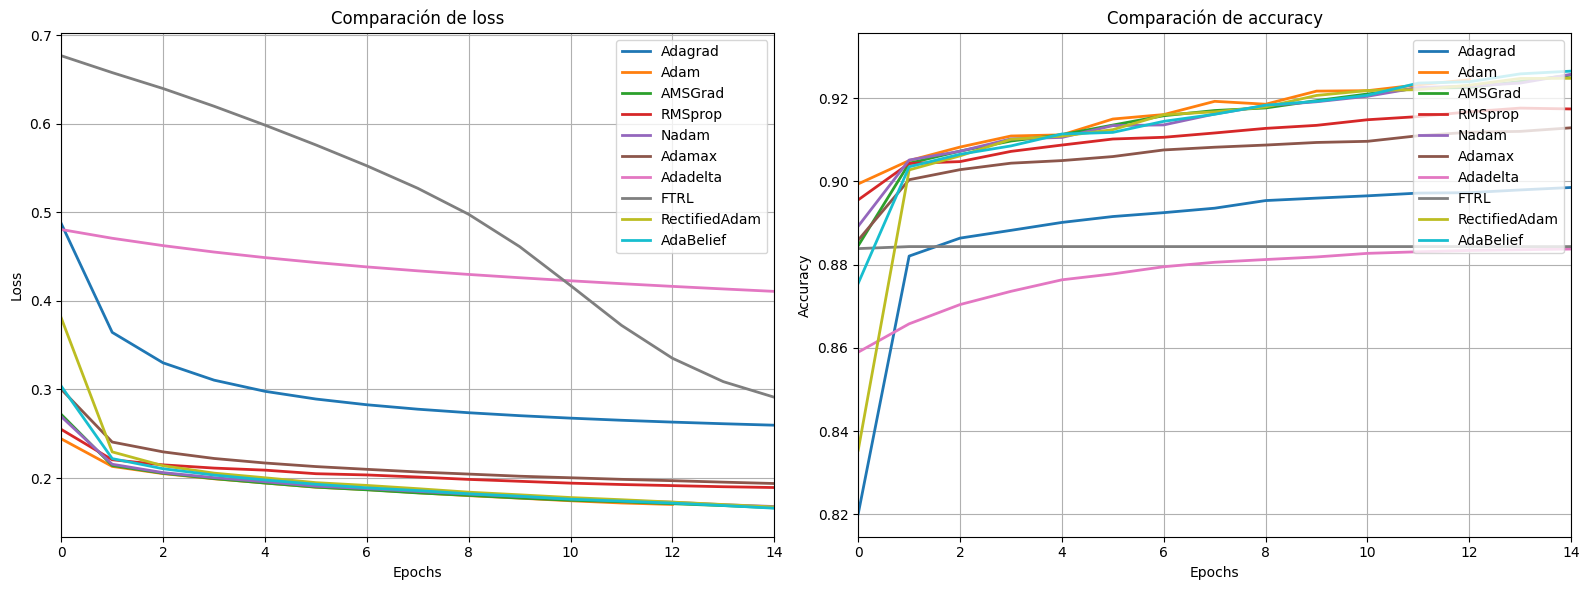

In [70]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.show()


MODELO CON FUNCIONES DE ACTIVACION

In [71]:
# Importar la versión legacy del optimizador Adam el cual es el elegido para el proyecto
from tensorflow.keras.optimizers import legacy

# Definir las activaciones a probar
activaciones = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'ELU': 'elu',
    'SELU': 'selu',
    'Mish': 'mish',  # Si Mish no está disponible en tu entorno, puedes omitirla
    'Linear': 'linear'
}



# Entrenar el modelo y guardar historiales
# Definir el optimizador Nadam en su versión legacy
optimizer = optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Entrenar el modelo y guardar historiales y modelos
histories = {}  # Almacenar historiales de entrenamiento
models = {}     # Almacenar los modelos entrenados
for name, act in activaciones.items():
    print(f"\nEntrenando modelo con activación {name}...")
    model, history = build_and_train_model(optimizer, act, 64, name=name)
    histories[name] = history  # Guardar el historial del modelo
    models[name] = model       # Guardar el modelo entrenado





Entrenando modelo con activación ReLU...
Epoch 1/50
905/905 [==============================] - 2s 2ms/step - loss: 0.2543 - accuracy: 0.8961 - val_loss: 0.2272 - val_accuracy: 0.8967
Epoch 2/50
113/905 [==>...........................] - ETA: 1s - loss: 0.2168 - accuracy: 0.9082

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


905/905 [==============================] - 1s 1ms/step - loss: 0.2149 - accuracy: 0.9040 - val_loss: 0.2235 - val_accuracy: 0.8967
Epoch 3/50
905/905 [==============================] - 1s 1ms/step - loss: 0.2063 - accuracy: 0.9080 - val_loss: 0.2161 - val_accuracy: 0.9005
Epoch 4/50
905/905 [==============================] - 1s 1ms/step - loss: 0.1998 - accuracy: 0.9090 - val_loss: 0.2163 - val_accuracy: 0.9017
Epoch 5/50
905/905 [==============================] - 1s 1ms/step - loss: 0.1948 - accuracy: 0.9116 - val_loss: 0.2148 - val_accuracy: 0.9001
Epoch 6/50
905/905 [==============================] - 1s 1ms/step - loss: 0.1901 - accuracy: 0.9150 - val_loss: 0.2176 - val_accuracy: 0.8999
Epoch 7/50
905/905 [==============================] - 1s 1ms/step - loss: 0.1870 - accuracy: 0.9166 - val_loss: 0.2162 - val_accuracy: 0.9002
Epoch 8/50
905/905 [==============================] - 1s 1ms/step - loss: 0.1838 - accuracy: 0.9173 - val_loss: 0.2157 - val_accuracy: 0.9017
Epoch 9/50
905/90

283/283 [==============================] - 0s 829us/step


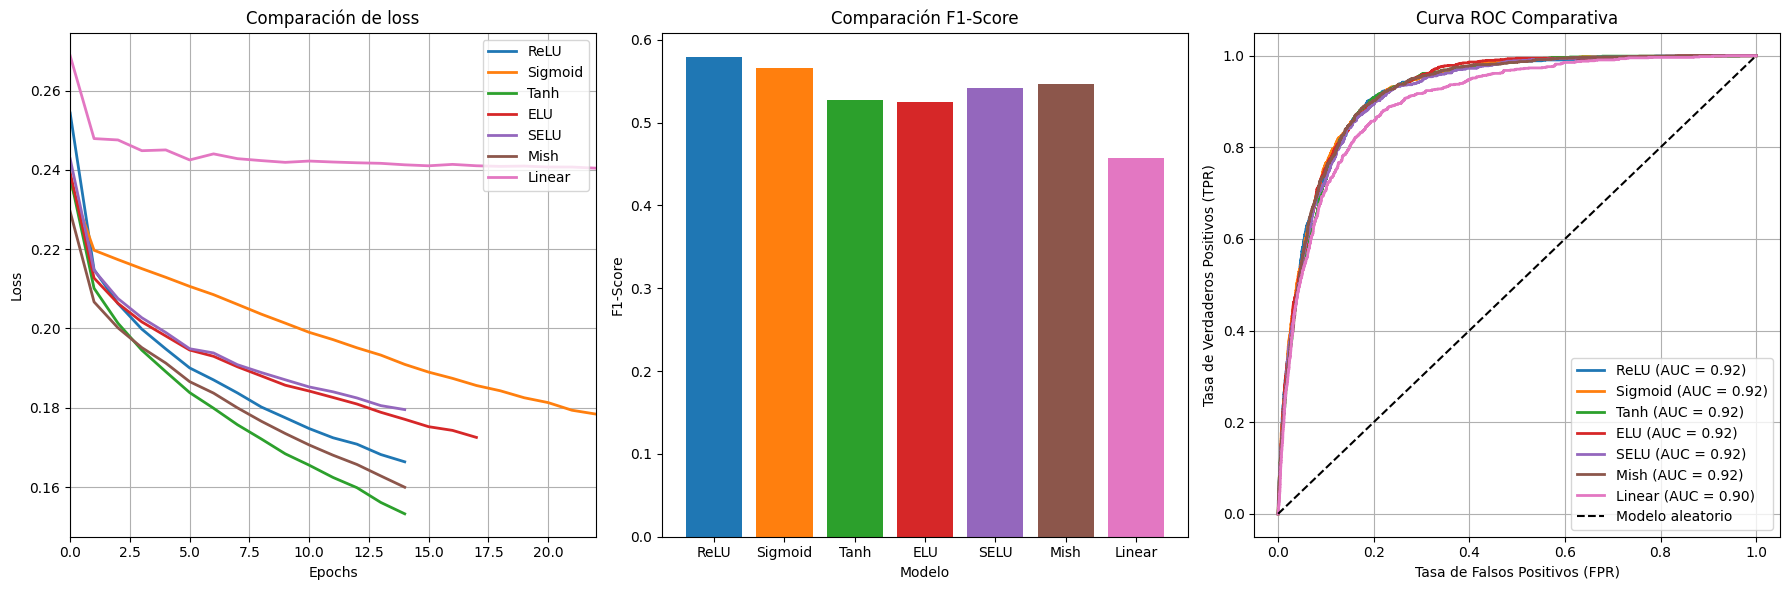

In [72]:
from sklearn.metrics import f1_score, roc_curve, auc

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Tres gráficos: Loss, F1 y ROC

# Métricas a graficar
metrics = ["loss"]

# Graficar 'loss' durante el entrenamiento para cada modelo
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

# Gráfica F1-Score y curva ROC después del entrenamiento
for name, model in models.items():  # Ahora tienes un diccionario 'models' con tus modelos entrenados
    # Predicciones y F1-Score en el conjunto de validación
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    # Graficar F1-Score
    axs[1].bar(name, f1)
    axs[1].set_title('Comparación F1-Score')
    axs[1].set_xlabel("Modelo")
    axs[1].set_ylabel("F1-Score")
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar curva ROC
    axs[2].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', linewidth=2)

# Configurar la gráfica ROC
axs[2].plot([0, 1], [0, 1], 'k--', label='Modelo aleatorio')
axs[2].set_title('Curva ROC Comparativa')
axs[2].set_xlabel('Tasa de Falsos Positivos (FPR)')
axs[2].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axs[2].legend(loc="lower right")
axs[2].grid()

plt.tight_layout()
plt.show()



In [73]:
#def build_model(activacion1, activacion2, neuronas, input_shape):
    #tf.random.set_seed(42)
    #return tf.keras.Sequential([
        #tf.keras.layers.Input(shape=input_shape),
        #tf.keras.layers.Dense(neuronas, activation=activacion1, 
                              #kernel_initializer="he_normal"),
        #tf.keras.layers.Dense(neuronas//2, activation=activacion2, 
                              #kernel_initializer="he_normal"),
        #tf.keras.layers.Dense(1, activation="sigmoid")  # Salida binaria
    #])

#def build_and_train_model(optimizer, activacion1, activacion2, neuronas, epochs=10):
    ##input_shape = (X_train.shape[1],)  # Definir la forma de entrada
    #model = build_model(activacion1, activacion2, neuronas, input_shape)
    
    # Compilar el modelo
    #model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Entrenar el modelo
    #history = model.fit(X_train, y_train, epochs=epochs,
                        #validation_data=(X_test, y_test), verbose=1)
    
    #return model, history


In [74]:
# Usar la versión legacy del optimizador Nadam
#from tensorflow.keras.optimizers import legacy

# Definir el optimizador Nadam en su versión legacy
#optimizer = legacy.Nadam(learning_rate=0.001)

# Definir las combinaciones de activaciones a probar
#activaciones = {
    #'tanh_mish': ('tanh', 'mish'),
    #'ReLU_Tanh': ('relu', 'tanh'),
    #'mish_relu': ('mish', 'relu')
#}

# Entrenar y guardar historiales
#histories = {}
#for name, (act1, act2) in activaciones.items():
    #print(f"\nEntrenando modelo con activación {name}...")
    #model, history = build_and_train_model(optimizer, act1, act2, neuronas=64, epochs=10)
    #histories[name] = history  # Guardar solo el historial


Se toman las 3 funciones con mejor comportamiento para analizar en el modelo 

In [75]:
def build_model(activacion1, activacion2, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion1,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion2,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion1, activacion2, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion1, activacion2,  neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

import itertools

# Lista de funciones de activación
activaciones = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Mish': 'mish'
}

# Crear todas las combinaciones posibles
combinaciones = list(itertools.product(activaciones.values(), repeat=2))
combinaciones

histories = {}
for activacion1, activacion2 in combinaciones:
    combinacion = f"{activacion1} + {activacion2}"
    histories[combinacion] = build_and_train_model(tf.keras.optimizers.Nadam(learning_rate=0.001),activacion1, activacion2,64)



Epoch 1/10
905/905 [==============================] - 2s 2ms/step - loss: 0.2794 - accuracy: 0.8844 - val_loss: 0.2341 - val_accuracy: 0.8986
Epoch 2/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2179 - accuracy: 0.9052 - val_loss: 0.2269 - val_accuracy: 0.8996
Epoch 3/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2082 - accuracy: 0.9082 - val_loss: 0.2239 - val_accuracy: 0.8996
Epoch 4/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2015 - accuracy: 0.9103 - val_loss: 0.2200 - val_accuracy: 0.9030
Epoch 5/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1970 - accuracy: 0.9111 - val_loss: 0.2179 - val_accuracy: 0.9030
Epoch 6/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1925 - accuracy: 0.9125 - val_loss: 0.2196 - val_accuracy: 0.9028
Epoch 7/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1894 - accuracy: 0.9157 - val_loss: 0.2185 - val_accuracy: 0.9045
Epoch 

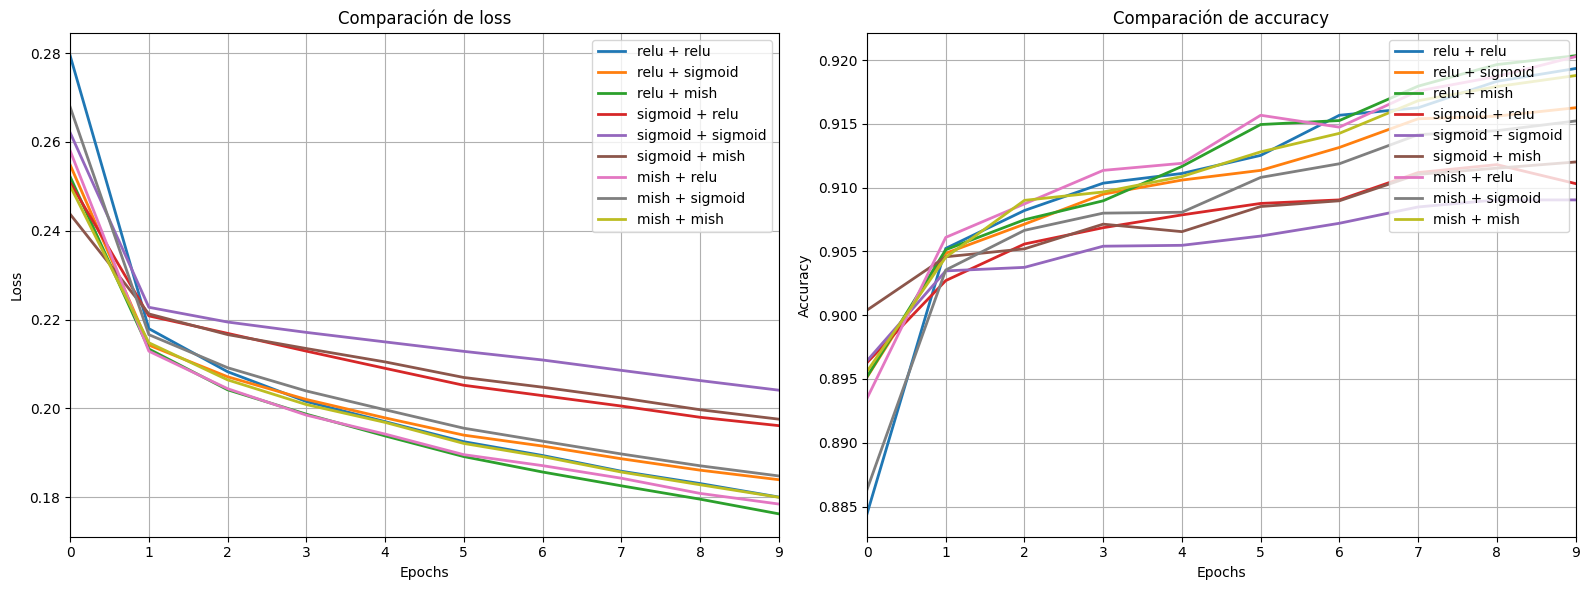

In [76]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
#plt.axis([0, 9, 0.5, 0.8])
plt.show()



SE ANALIZA AHORA EL NUMERO DE NEURONAS TOMANDO LAS FUNCION RELU COMO LA DE MEJOR COMPORTAMIENTO

In [77]:


def build_model(activacion, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

In [78]:
num_neurons_list = [2 ** i for i in range(3, 9)]
num_neurons_list
histories = {}
for neuronas in num_neurons_list:
    combinacion = f"{neuronas} neuronas"
    histories[combinacion] = build_and_train_model(tf.keras.optimizers.Nadam(learning_rate=0.001),'relu',neuronas)

Epoch 1/10
905/905 [==============================] - 2s 2ms/step - loss: 0.3771 - accuracy: 0.8508 - val_loss: 0.2596 - val_accuracy: 0.8899
Epoch 2/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.8965 - val_loss: 0.2360 - val_accuracy: 0.8948
Epoch 3/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2235 - accuracy: 0.9021 - val_loss: 0.2309 - val_accuracy: 0.8978
Epoch 4/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2187 - accuracy: 0.9028 - val_loss: 0.2281 - val_accuracy: 0.8993
Epoch 5/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2157 - accuracy: 0.9040 - val_loss: 0.2262 - val_accuracy: 0.8985
Epoch 6/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2134 - accuracy: 0.9037 - val_loss: 0.2243 - val_accuracy: 0.8997
Epoch 7/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2115 - accuracy: 0.9040 - val_loss: 0.2235 - val_accuracy: 0.8984
Epoch 

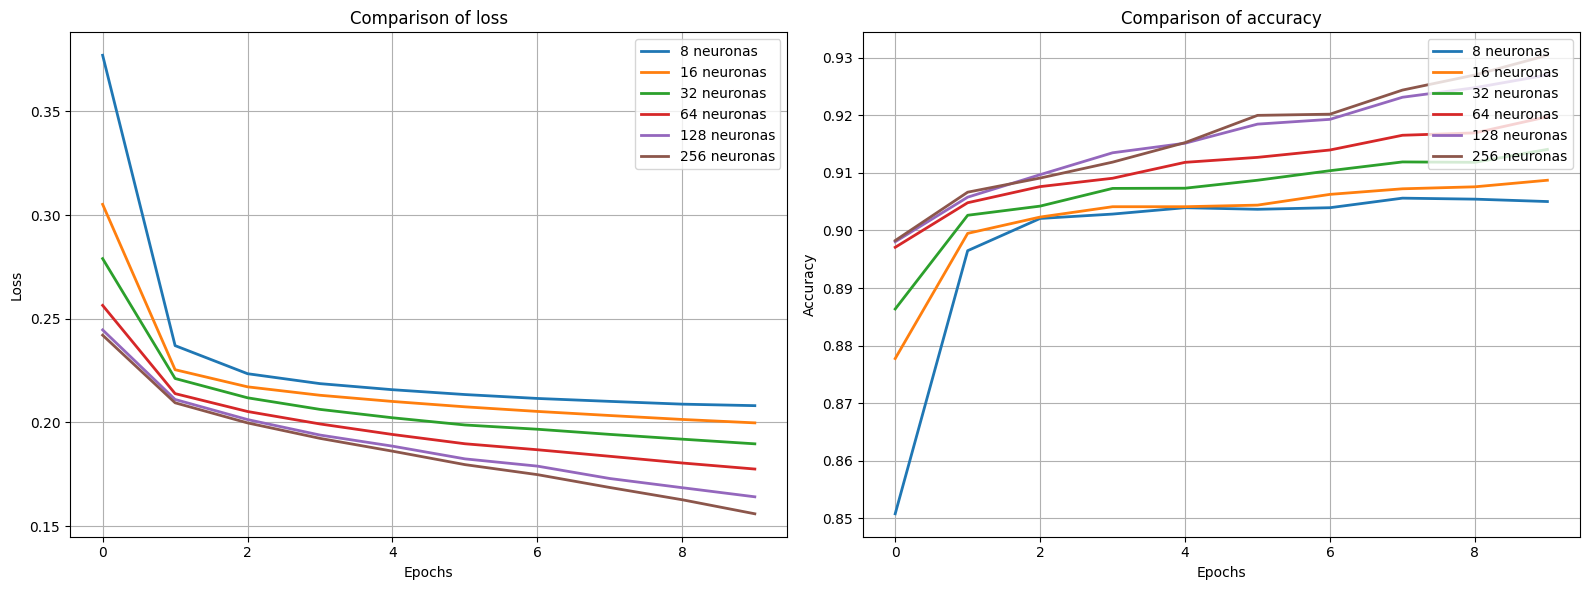

In [79]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for combinacion, history in histories.items():
        ax.plot(history.history[metric], label=f"{combinacion}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparison of {metric}")
    

plt.tight_layout()
#plt.axis([0, 9, 0.5, 0.8])
plt.show()

MODELO FINAL

In [83]:
#Se cambia la función para que devuelva el modelo además del fit

def build_model(activacion, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model, model.fit(X_train, y_train, epochs=50,
                     validation_data=(X_test, y_test))


In [84]:


# Optimizer, activation, and neurons settings
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
activacion = 'relu'
neuronas = 64

# Entrenar el modelo y obtener el historial
retorno=build_and_train_model(optimizer,activacion,neuronas)
model=retorno[0]
history_final = retorno[1]

Epoch 1/10
905/905 [==============================] - 2s 2ms/step - loss: 0.2619 - accuracy: 0.8910 - val_loss: 0.2262 - val_accuracy: 0.9026
Epoch 2/10
905/905 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9054 - val_loss: 0.2213 - val_accuracy: 0.9017
Epoch 3/10
905/905 [==============================] - 1s 1ms/step - loss: 0.2049 - accuracy: 0.9084 - val_loss: 0.2213 - val_accuracy: 0.9003
Epoch 4/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1996 - accuracy: 0.9099 - val_loss: 0.2163 - val_accuracy: 0.9061
Epoch 5/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1949 - accuracy: 0.9115 - val_loss: 0.2184 - val_accuracy: 0.9016
Epoch 6/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1905 - accuracy: 0.9131 - val_loss: 0.2188 - val_accuracy: 0.8994
Epoch 7/10
905/905 [==============================] - 1s 1ms/step - loss: 0.1873 - accuracy: 0.9149 - val_loss: 0.2185 - val_accuracy: 0.9016
Epoch 

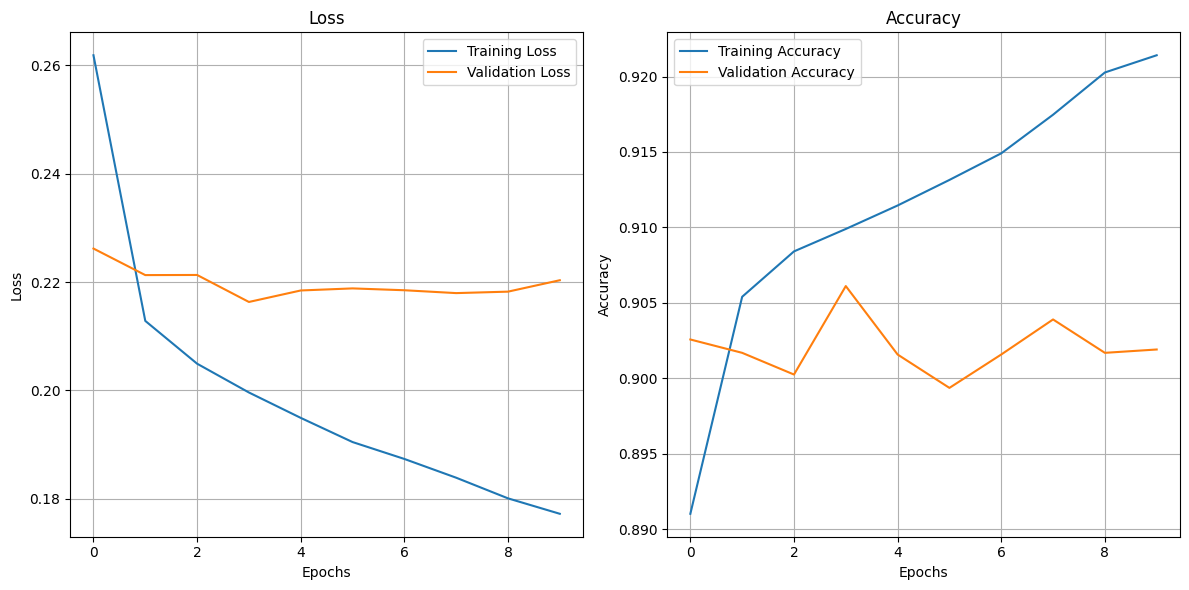

In [85]:
# Graficar los resultados
def plot_results(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Graficar pérdida (loss)
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    # Graficar precisión (accuracy)
    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_results(history_final)